In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import Quandl
%pylab inline
sb.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [78]:
# Quandl.get("CURRFX/USDBRL", trim_start="1996-09-09", trim_end="2015-09-25")
# data = Quandl.get(["BCB/433", "BCB/3695"], trim_start="1994-12-01") # 3695: Dólar Mensal
data = Quandl.get(["BCB/433", "CURRFX/USDBRL"], trim_start="1996-09-01", collapse="monthly")
# data2 = Quandl.get("BCB/433", trim_start="1999-01-01")

In [79]:
data = data[[0,1]]

In [80]:
data.columns = ["IPCA", "IBOVESPA"]

In [81]:
data

,IPCA,IBOVESPA
Date,,
1996-09-30,0.15,1.02085
1996-10-31,0.30,1.02742
1996-11-30,0.32,1.03268
1996-12-31,0.47,1.03904
1997-01-31,1.18,1.04562
1997-02-28,0.50,1.05104
1997-03-31,0.51,1.05923
1997-04-30,0.88,1.06327
1997-05-31,0.41,1.07233


In [82]:
data.head()

,IPCA,IBOVESPA
Date,,
1996-09-30,0.15,1.02085
1996-10-31,0.30,1.02742
1996-11-30,0.32,1.03268
1996-12-31,0.47,1.03904
1997-01-31,1.18,1.04562


In [83]:
data["IBOVESPA"].diff().shift(-1).head()

Date
1996-09-30    0.00657
1996-10-31    0.00526
1996-11-30    0.00636
1996-12-31    0.00658
1997-01-31    0.00542
Name: IBOVESPA, dtype: float64

In [84]:
data["IBOVESPA"].head()

Date
1996-09-30    1.02085
1996-10-31    1.02742
1996-11-30    1.03268
1996-12-31    1.03904
1997-01-31    1.04562
Name: IBOVESPA, dtype: float64

In [85]:
data["IBOVESPA_D"] = (data["IBOVESPA"].diff().shift(-1)/data["IBOVESPA"]).shift()

In [86]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D
Date,,,
1996-09-30,0.15,1.02085,NaN
1996-10-31,0.30,1.02742,0.006436
1996-11-30,0.32,1.03268,0.005120
1996-12-31,0.47,1.03904,0.006159
1997-01-31,1.18,1.04562,0.006333


In [87]:
# (data["IBOVESPA"][0]*(1 + data["IBOVESPA_D"]).shift(-1)).shift().head()
data["IBOVESPA"][0]*(np.cumprod((1 + data["IBOVESPA_D"]).shift(-1)).shift()).head()

Date
1996-09-30        NaN
1996-10-31    1.02742
1996-11-30    1.03268
1996-12-31    1.03904
1997-01-31    1.04562
Name: IBOVESPA_D, dtype: float64

In [88]:
data["IBOVESPA_D_DEFL"] = (1 + data["IBOVESPA_D"])/(1 + data["IPCA"]/100) - 1
data.tail()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL
Date,,,,
2015-05-31,0.74,3.15383,0.076055,0.068150
2015-06-30,0.79,3.14274,-0.003516,-0.011327
2015-07-31,0.62,3.34648,0.064829,0.058268
2015-08-31,0.22,3.58149,0.070226,0.067877
2015-09-30,NaN,4.12643,0.152155,NaN


In [89]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL
Date,,,,
1996-09-30,0.15,1.02085,NaN,NaN
1996-10-31,0.30,1.02742,0.006436,0.003426
1996-11-30,0.32,1.03268,0.005120,0.001913
1996-12-31,0.47,1.03904,0.006159,0.001452
1997-01-31,1.18,1.04562,0.006333,-0.005403


In [90]:
data["IBOVESPA_DEFL"] = data["IBOVESPA"][0]*(np.cumprod((1 + data["IBOVESPA_D_DEFL"]).shift(-1)).shift())

In [91]:
data["IBOVESPA_DEFL"][0] = data["IBOVESPA"][0]

In [92]:
data.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL,IBOVESPA_DEFL
Date,,,,,
1996-09-30,0.15,1.02085,NaN,NaN,1.020850
1996-10-31,0.30,1.02742,0.006436,0.003426,1.024347
1996-11-30,0.32,1.03268,0.005120,0.001913,1.026307
1996-12-31,0.47,1.03904,0.006159,0.001452,1.027797
1997-01-31,1.18,1.04562,0.006333,-0.005403,1.022243


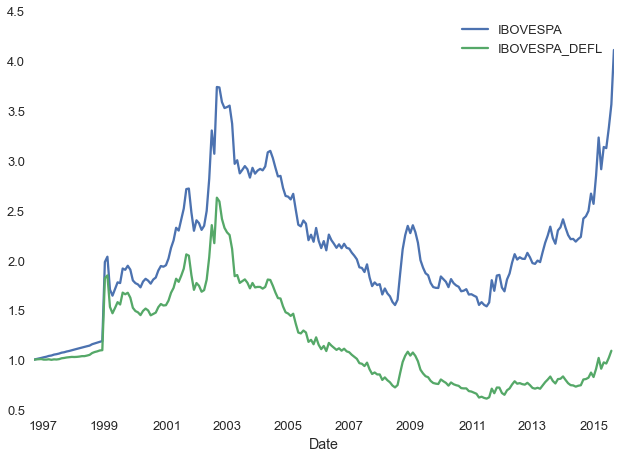

In [93]:
data[["IBOVESPA", "IBOVESPA_DEFL"]].plot();

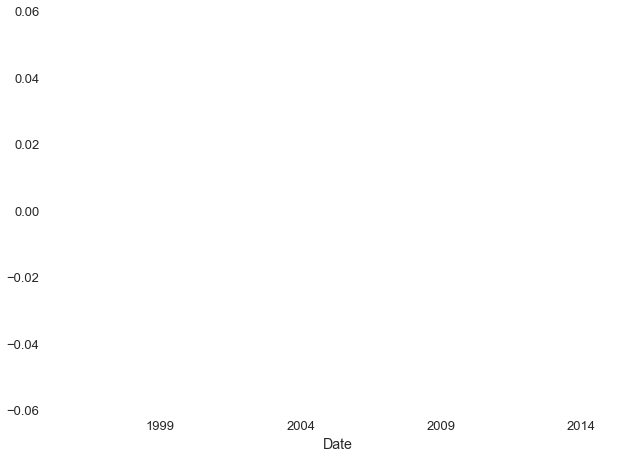

In [72]:
(data["IBOVESPA"]-data["IBOVESPA_DEFL"]).plot();